# **Denoising Image using Autoencoder**

## Installing Requirements

We firstly install the libraries required for the code. We are installing `virtualenv` for setting up the environment and activate it. Also `tensorflow` to enable the `tensorflow` modules.

In [ ]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 16.0 MB/s eta 0:00:00


In [ ]:
!virtualenv env

created virtual environment CPython3.10.12.final.0-64 in 1373ms
  creator CPython3Posix(dest=/content/env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.2.1, setuptools==68.2.0, wheel==0.41.2
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source ./env/bin/activate

In [ ]:
!pip install tensorflow

## Building the Model & Training the dataset

After installing everything, we move on to importing all of the modules such as `numpy`, `matplotlib.pyplot`, `tensorflow`, and keras modules. For the keras modules, we import the `keras.datasets` to display the MNIST dataset, and `tensorflow.keras.models` to import `Model` function.

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model

### Import dataset and noise

Next, we can start importing the dataset. Here, we define first the train and test variable and load the mnist data. We also put out the shape to represent the dimensions of the training dataset.

In [ ]:
#import dataset

(X_train,_),(X_test,_) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

The result is `(60000, 28, 28)` for `X_train`, meaning that there are 60,000 data samples with width of 28 and height of 28. Next, we check the `X_test`.

In [ ]:
X_test.shape

(10000, 28, 28)

The result is `(10000, 28, 28)` for `X_test` meaning that there are 10,000 data samples with width of 28 and height of 28.

After that, we want to show the datasets using `X_train`. We set the data to have 2 rows and 10 columns. We also set the figure size to the width of 16 and hight of 2. We then set the count to 0 to keep track of the current position in the grid of subplots.

Then, we put a nested loop for running the `i` values. The outer loop is for running the 2 rows (`i` values from 0 to 1) and the inner loop is for running the `j` values which is the 10 columns. Inside both loops, we display the dataset data in the current subplot. The `count` is used to index the images in your `X_train` dataset. Then, we add `cmap='gray'` to specify the colormap for displaying the dataset. Once the dataset is shown in the current subplot, the variable `count` is increased to proceed to the subsequent image within the `X_train` dataset. Then, we proceed to show the dataset.

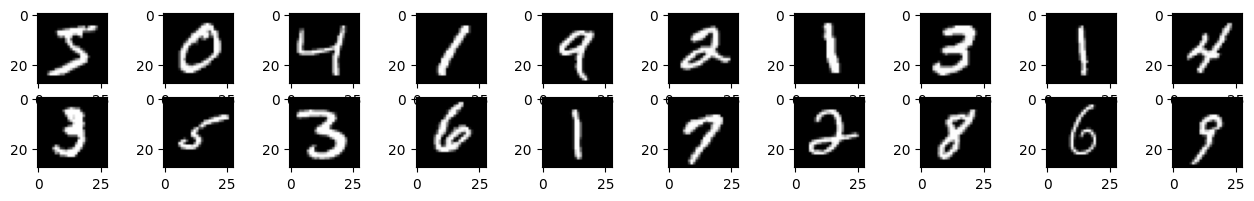

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(16, 2))

count = 0

for i in range(2):
    for j in range(10):
        axes[i, j].imshow(X_train[count], cmap='gray')
        count += 1

plt.show()

Then, we want to do feature scaling or normalization by dividing each pixel values by 255, in order to scale the pixel values from their original range of [0,255] to a new range of [0, 1]. This step is taken to guarantee that all pixel values fall within the interval [0, 1], which is a common practice for preparing the dataset to be suitable for training neural networks.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Next, we want to add the noise to the dataset. We first define the `noise_factor` to put the scale of noise we want. Here, we put 0.1. Then, we put both of the dataset to be exposed to the noise. We add multiplication to each variable with `np.random.normal(loc=0., scale=1., size=X_train.shape)` to generate random noise following a normal distribution. `loc` as the mean, `scale` as the standart deviation, and `size` to specify the shape of the noise array matching the shape of `X_train` and `X_test` .


In [ ]:
#Add Noise

noise_factor = 0.1

X_train_noise = X_train + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_test.shape)

Then, we print again the `X_train_noise`. The difference is that, the number of channel is added to show the color channel which is grayscale.

In [ ]:
X_train_noise.shape

(60000, 28, 28)

Next, we want to plot out the dataset with noise after defined by the noise adding function. We set the data to have 2 rows and 10 columns just like the normal dataset. We also set the figure size to the width of 16 and height of 2.

Basically, the dataset showing code is the same as the previous one,we put a nested loop for running the `i` values. The outer part is for the `i` values (2 rows) and the inner part is for the `j` values (10 columns).Then, we display the dataset in the current subplot. Next, we add `cmap='gray`' to specify the colormap for displaying the dataset. Once the dataset is shown in the current subplot, the variable count is increased to proceed to the subsequent image within the `X_train` dataset. Then, we proceed to show the dataset

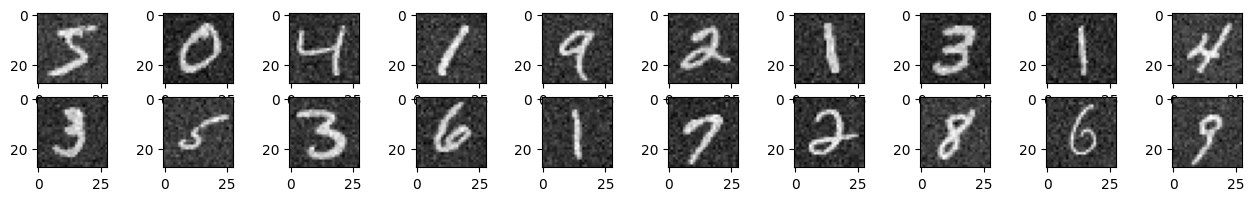

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(16, 2))

count = 0
for i in range(2):
    for j in range(10):
        axes[i, j].imshow(X_train_noise[count], cmap='gray')
        count += 1

plt.show()

We can see that the image has noises compared to the first one. Next, we want to reshape the data so that the dataset can be fed to a CNN. We define the `X_train` and `X_test` with `.reshape` and put `.shape` in it as the new shape of `(number of samples order, width, height, and color channel)`. As for the noise variables, they are being treated the same as the above variables to ensure that they have the same shape, also to prove they are both compatible with our model later. We then print both of the shapes of the normal and noise version of `X_train` to check if they are already successful in reshaping.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28, 28, 1)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28, 28, 1)

X_train.shape, X_train_noise.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

The result shows the numbers inside the dimensions are the same, meaning they are ready to be used.


The same process goes for `X_test`.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28, 28, 1)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28, 28, 1)

X_test.shape, X_test_noise.shape

((10000, 28, 28, 1), (10000, 28, 28, 1))

### Buiding the model

Now, we move on to creating the foundation of the model training. We first import the keras modules like `Sequential` from `keras.models `to allow us in building NN model by stacking layers in a sequential manner. Then, from `keras.layers`, we import `Conv2D` for 2D convolution operations, a function used to extract features from input data, in this case, images. We also import `MaxPooling2D` for 2D max-pooling operations, used to reduce spatial dimensions of input data by selecting the maximum value. Then, there is `UpSampling2D` for 2D upsampling operation which increases the spatial dimensions of the input data. Lastly, there is the `Conv2DTranspose`, which us used for 2D transposed convolution operations, also known as "deconvolution". One more keras module we add, is `SGD` from `keras.optimizers`. We use this to update the weights of NN layers during training. It's responsible for adjusting the model's parameters to minimize a specified loss function.



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.optimizers import SGD

After importing, we get to the main code. The first variable, which is model initializes the `Sequential()` to stack the layers later on. THen, we first add the first layer which is the `Conv2D`. We put 16 filters and set each pooling size to `(3, 3)`. ReLU activation function will also be applied to the output of the layer. The padding is set to `"same"` in order for the input data to be padded to zeros so that the output will have the same spatial dimensions as the input. We finally add the `input_shape` with dimensions of `28x28` pixels and 1 color channel (grayscale).

As for the second layer, we put the `MaxPooling2D` with the pooling size of `(2, 2)`. The `padding="same"` has the same function, which is to ensure the output to have the same spatial dimensions as the input. We then place the third layer with the same variable and module as the first layer, only, we do not use the `input_shape` again since it is already defined in the first layer. It is used again to follow the encoder decoder order of layers.

Then, the fourth layer will be filled with `UpSampling2D` with the pooling size of `(2, 2)`, only, we do not add further variables since it doesn't have learnable parameters or activation functions, and only used as scaling factor. As for the final layer, we add `Conv2D` with only 1 filter and pooling size of `(3, 3)`, `"sigmoid"` as activation function, and padding of zero. This layer aims to reconstruct the denoised image. Technically,the first three layer is for the encoder and the last two layer is for the decoder.  

Next, we define the optimizer with SGD with learning rate of 0.01. After that, we compile the model by specifying the loss function as binary_crossentropy which is commomnly used for binary classification or image reconstruction tasks. The optimizer is set to the previously defined SGD optimizer. Finally, the `model.summary()` displays the summary of the model architecture, showing the layers, output shapes, and the number of trainable parameters.

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding="same"))

optimizer = SGD(lr=0.01)

model.compile(loss='binary_crossentropy', optimizer=optimizer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 28, 28, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 2625 (10.25 KB)
Trainable params: 2625 (10

### Training the model (DO NOT RUN THIS PART)

After constructing the model, we want to train the model. We start by training the normal model. Here, we divide the train and test for the model. Training for training the model, testing for testing the data using the model asfter trained. We define the model that wants to be trained. We first define the `x` and `y` as `X_train` to reconstruct the input data in order for the model to learn the representation of the data (unsupervised learning element). Then, we set the `epochs` to 50, so that the training will be done 50 times and `batch_size` to 128, so that the training data will divide the batches to 128 examples. Then, we put `shuffle=True` to indicate that the training data should be shuffled randomly before each epoch in order to prevent the model from learning the order of the training data and can lead to more stable and effective training. Lastly, we define the `validation_data` to specify a validation dataset to evaluate the model's performance during training. In this case, we use `X_test`. It is useful to check whether the model experiences overfitting or not.


In [1]:
model.fit(
    x = X_train,
    y = X_train,
    epochs = 50,
    batch_size = 128,
    shuffle=True,
    validation_data=(X_test,X_test)
)

NameError: ignored

After generated for about an hour, we save the model for future use so that we just need to upload the model.

In [ ]:
model.save("model_normal.h5")

After constructing the normal one, it is time to move to the ones with noise. We start by defining the model that wants to be trained, in this case `X_train_noise` and `X_train`, because we want the model to be trained to map the samples with noises and the normal ones. So that later, the model can understand the goal which is to remove the noise from data.
Similar to the normal one, we set the `epochs` to 50 and `batch_size` to 128. Then, we put `shuffle=True`, and lastly, we define the `validation_data` using `X_test_noise` and `X_test` for defining both type of dataset (with noises and normal).

In [ ]:
model.fit(
    x = X_train_noise,
    y = X_train,
    epochs = 50,
    batch_size = 128,
    shuffle=True,
    validation_data=(X_test_noise,X_test)
)

Epoch 1/50
469/469 [==============================] - 88s 188ms/step - loss: 0.0709 - val_loss: 0.0703
Epoch 2/50
469/469 [==============================] - 88s 187ms/step - loss: 0.0708 - val_loss: 0.0702
Epoch 3/50
469/469 [==============================] - 87s 186ms/step - loss: 0.0707 - val_loss: 0.0701
Epoch 4/50
469/469 [==============================] - 84s 179ms/step - loss: 0.0706 - val_loss: 0.0701
Epoch 5/50
469/469 [==============================] - 83s 177ms/step - loss: 0.0705 - val_loss: 0.0700
Epoch 6/50
469/469 [==============================] - 85s 182ms/step - loss: 0.0705 - val_loss: 0.0699
Epoch 7/50
469/469 [==============================] - 83s 177ms/step - loss: 0.0704 - val_loss: 0.0699
Epoch 8/50
469/469 [==============================] - 85s 181ms/step - loss: 0.0703 - val_loss: 0.0698
Epoch 9/50
469/469 [==============================] - 84s 179ms/step - loss: 0.0703 - val_loss: 0.0697
Epoch 10/50
469/469 [==============================] - 84s 180ms/step - l

Just like the first one, it took an hour for the model to learn all of the samples. We then save the model for future use.

In [ ]:
model.save("model_train.h5")

## The Result

After training the model, we can upload the model here. We upload first the saved model to files (2 `.h5` files in the folder alongside the essay). Next, we can import the `load_model` function and load the model using the model file name.

In [ ]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("model_normal.h5")

After that, we upload the dataset using the trained model. It is used so that the model could see the initial training dataset before noise is implemented. We first define the prediction using the `loaded_model` which was the model we saved first on normal test data(`X_test`).  We used the image display function to the data to be shown.

313/313 [==============================] - 4s 13ms/step


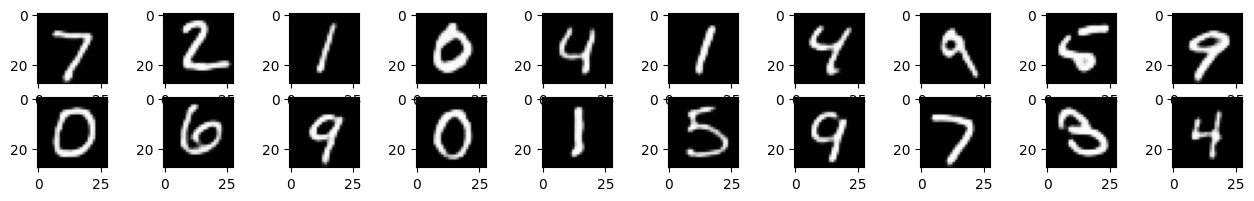

In [ ]:
predictions = loaded_model.predict(X_test)

fig, axes = plt.subplots(2, 10, figsize=(16, 2))

count = 0
for i in range(2):
    for j in range(10):
        axes[i, j].imshow(predictions[count].reshape(28, 28), cmap='gray')
        count += 1

plt.show()

After that, we want to upload the second model which is the one we trained on dataset with noises.

In [ ]:
from keras.models import load_model

# Load the saved model
loaded_model1 = load_model("model_train.h5")

After that, we use the image display function. here, we display the dataset with noises.

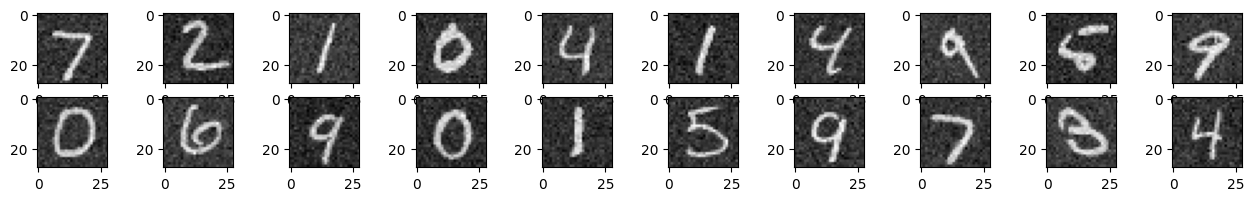

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(16, 2))

count = 0
for i in range(2):
    for j in range(10):
        axes[i, j].imshow(X_test_noise[count], cmap='gray')
        count += 1

plt.show()

After displaying the dataset with noises, we make a new variable for the denoised dataset image. Here, we input the dataset with noises to the trained model. Later, the model will predict what the denoised dataset would look like. The predictions represent what the model believes the normal version of the input dataset should be.

In [ ]:
no_noise_img = loaded_model1.predict(X_test_noise)

313/313 [==============================] - 4s 14ms/step


After the model is loaded and predicts, we display the image display function for the denoised dataset.

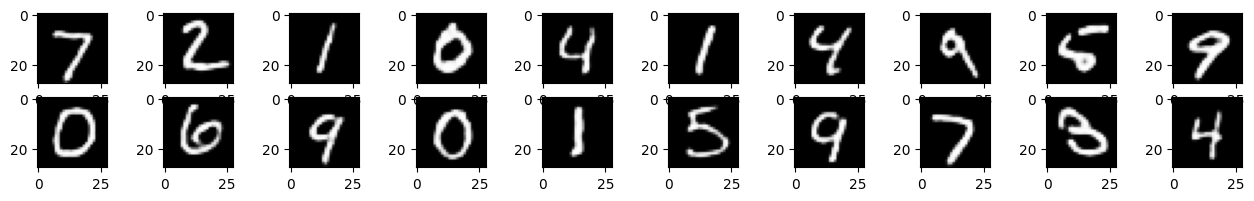

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(16, 2))

count = 0
for i in range(2):
    for j in range(10):
        axes[i, j].imshow(no_noise_img[count].reshape(28, 28), cmap='gray')
        count += 1

plt.show()

From here, we can see that the model successfully denoised the image in the dataset entirely.